In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

df= pd.read_csv('/content/drive/MyDrive/dataset.csv')

In [6]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [ ]:
print(df.duplicated().sum())

0


# **There are no duplicate and there are no nulls.**

In [7]:
#Converting target column to binary

df['Target']=df['Target'].map({'Graduate': 1 , 'Dropout': 0})

In [8]:
#confirming whether the conversion happened:

print(df['Target'].value_counts())

Target
1.0    2209
0.0    1421
Name: count, dtype: int64


In [9]:
#Updated info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

Yes- Convervion of the 'Target' variable occured

In [10]:
df['Target']= df['Target'].map({1:1, 0:0, 'Graduate': 1, 'Dropout': 0})

#dropping any missing rows with missing values
# Pass 'Target' as a keyword argument to the subset parameter.
df= df.dropna(subset=['Target'])

#converting 'Target' to integer
df['Target']=df['Target'].astype(int)

<ipython-input-10-1d86a21e1d32>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target']=df['Target'].astype(int)


In [11]:
#verfying the fix:

print(df['Target'].value_counts())

Target
1    2209
0    1421
Name: count, dtype: int64


In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3630 non-null   int64  
 1   Application mode                                3630 non-null   int64  
 2   Application order                               3630 non-null   int64  
 3   Course                                          3630 non-null   int64  
 4   Daytime/evening attendance                      3630 non-null   int64  
 5   Previous qualification                          3630 non-null   int64  
 6   Nacionality                                     3630 non-null   int64  
 7   Mother's qualification                          3630 non-null   int64  
 8   Father's qualification                          3630 non-null   int64  
 9   Mother's occupation                           

## **The data is now cleaned**

In [13]:
# Starting the EDA: first by checking strong predictors of Graduate/Dropout

import seaborn as sns
import matplotlib.pyplot as plt # importing the libraries


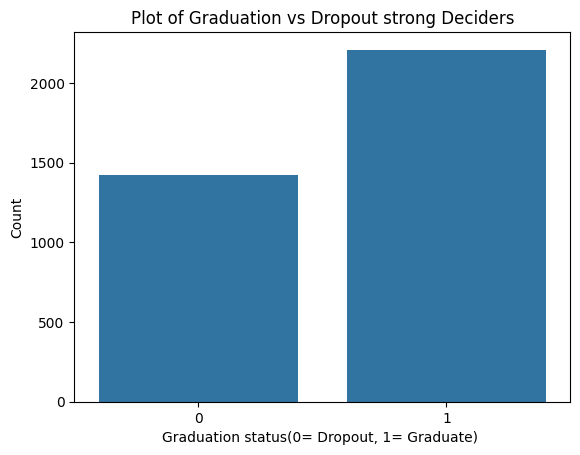

Target
1    0.60854
0    0.39146
Name: proportion, dtype: float64


In [14]:
sns.countplot(x=df['Target'])
plt.title('Plot of Graduation vs Dropout strong Deciders')
plt.xlabel('Graduation status(0= Dropout, 1= Graduate) ')
plt.ylabel('Count')
plt.show()

print(df['Target'].value_counts(normalize= True))


# **Finding the strong Correlations:**


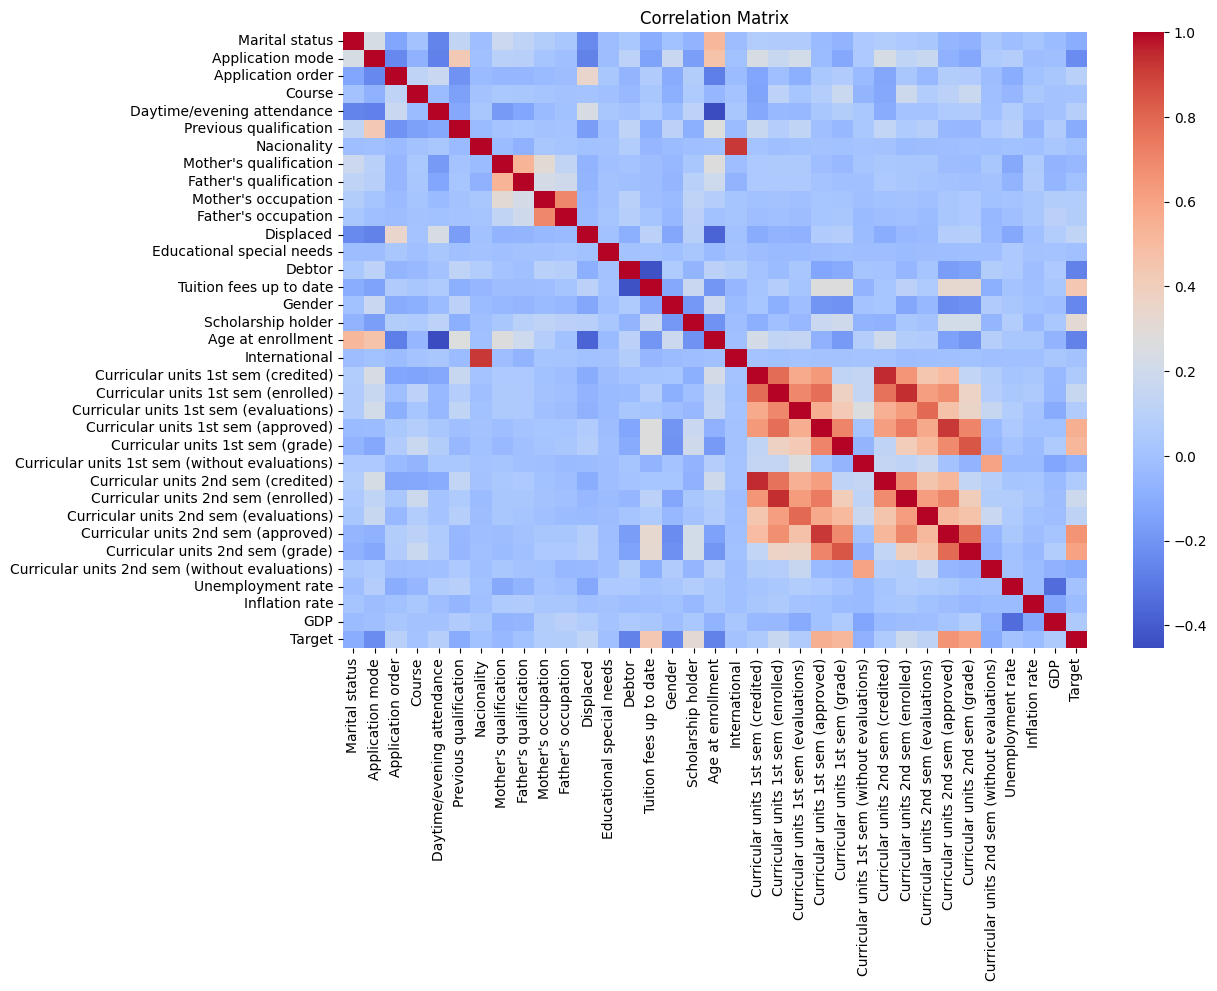

Target                                 1.000000
Curricular units 2nd sem (approved)    0.653995
Curricular units 2nd sem (grade)       0.605350
Curricular units 1st sem (approved)    0.554881
Curricular units 1st sem (grade)       0.519927
Tuition fees up to date                0.442138
Scholarship holder                     0.313018
Curricular units 2nd sem (enrolled)    0.182897
Curricular units 1st sem (enrolled)    0.161074
Displaced                              0.126113
Name: Target, dtype: float64


In [15]:
import numpy as np
import matplotlib.pyplot as plt # importing the libraries
import seaborn as sns


corrMatrix= df.corr()

#plotting the heatmap
#The figsize is passed as a kwarg inside plt.figure()
plt.figure(figsize=(12,8))
sns.heatmap(corrMatrix, cmap= 'coolwarm',annot= False, fmt= '.2f')
plt.title('Correlation Matrix')
plt.show()

print(corrMatrix['Target'].sort_values(ascending= False).head(10))

In [16]:
# knowing what the strongest influencers are:

selected_Features=["Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)",
    "Tuition fees up to date",
    "Scholarship holder"]

X= df[selected_Features] # these are the features
y= df["Target"] # the goal


# **Splitting and Training The Model**

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=42)

#Training the Random Forest Model:
model= RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#Make predictions
y_pred= model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8746556473829201

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83       277
           1       0.88      0.92      0.90       449

    accuracy                           0.87       726
   macro avg       0.87      0.86      0.87       726
weighted avg       0.87      0.87      0.87       726



# **Predicting for a student**

In [18]:
new_student = [5, 12.5, 4, 10.3, 1, 0]
# Reshape new_student to a 2D array with one row and multiple columns
new_student = np.array(new_student).reshape(1, -1)
# -1 automatically calculates the number of columns

prediction = model.predict(new_student)

print('Prediction: ', "Graduate" if prediction[0] == 1 else "Dropout")

Prediction:  Graduate


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [19]:
import joblib

In [21]:
joblib.dump(model, 'graduate_model.pkl')

#downloading this model on my local computer:
from google.colab import files
files.download('graduate_model.plk ')

FileNotFoundError: Cannot find file: graduate_model.plk 

In [22]:
joblib.dump(model, 'graduate_model.pkl')

#downloading this model on my local computer:
from google.colab import files
files.download('graduate_model.pkl') # Corrected the file extension from .plk to .pkl

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>